In [1]:
import pandas as pd
import numpy as np
import os
from scipy.stats import norm,skew
from scipy import stats
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import warnings
def ignore_warning(x):
    pass
warnings.warn = ignore_warning
%matplotlib inline

In [89]:
data_folder = os.path.join(os.path.abspath('./'),'Data')

In [90]:
df_train = pd.read_csv(data_folder+'/train.csv')

In [91]:
df_test = pd.read_csv(data_folder+'/test.csv')

In [92]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [93]:
print(f"The train data size before drop ID feature is: {df_train.shape}")
print(f"The test data size before drop ID feature is: {df_test.shape}")

The train data size before drop ID feature is: (1460, 81)
The test data size before drop ID feature is: (1459, 80)


In [94]:
train_ID = df_train.Id
test_ID = df_test.Id

In [8]:
df_train.drop("Id", axis=1, inplace=True)
df_test.drop("Id", axis=1, inplace=True)

In [9]:
print(f"The train data size before drop ID feature is: {df_train.shape}")
print(f"The test data size before drop ID feature is: {df_test.shape}")

The train data size before drop ID feature is: (1460, 80)
The test data size before drop ID feature is: (1459, 79)


Text(0,0.5,'SalePrice')

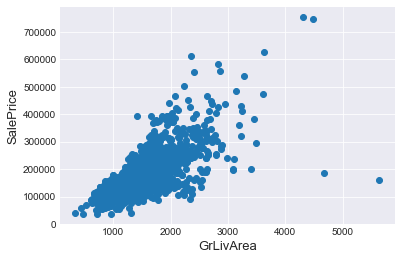

In [10]:
fig, ax = plt.subplots()
ax.scatter(df_train["GrLivArea"], df_train["SalePrice"])
plt.xlabel('GrLivArea', fontsize=13)
plt.ylabel('SalePrice', fontsize=13)

##### 删除离群点

In [11]:
df_train = df_train.drop(df_train[(df_train['GrLivArea'] > 4000) & (df_train['SalePrice'] < 300000)].index)

Text(0,0.5,'SalePrice')

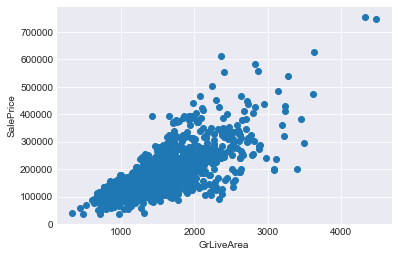

In [12]:
fig, ax = plt.subplots()
ax.scatter(df_train['GrLivArea'], df_train['SalePrice'])
plt.xlabel('GrLiveArea')
plt.ylabel('SalePrice')

#####  分析SalePrice变量

mu = 180932.92 and sigma = 79467.79


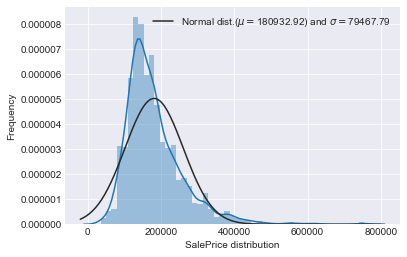

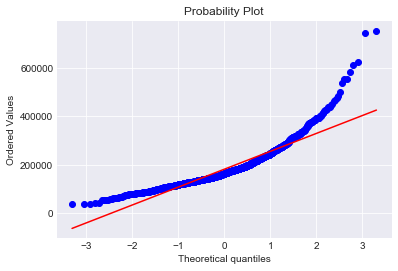

In [13]:
#直方图分析saleprice变量，看是否符合正态化
sns.distplot(df_train['SalePrice'], fit=norm)
(mu,sigma) = norm.fit(df_train['SalePrice'])
print(f'mu = {mu:.2f} and sigma = {sigma:.2f}')
plt.legend([f'Normal dist.($\mu=${mu:.2f}) and $\sigma=${sigma:.2f}'],loc='best')
plt.ylabel('Frequency')
plt.xlabel('SalePrice distribution')
fig = plt.figure() #新建一个画板
res = stats.probplot(df_train['SalePrice'], plot=plt)

In [14]:
df_train['SalePrice'] = np.log(df_train['SalePrice'])

mu = 12.02, sigma = 0.40


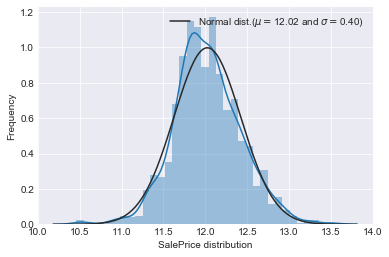

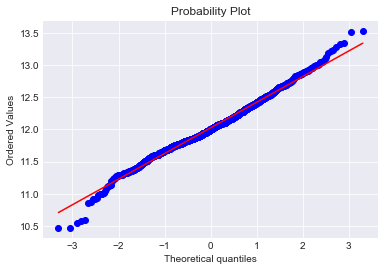

In [15]:
sns.distplot(df_train['SalePrice'], fit=norm)
(mu, sigma) = norm.fit(df_train['SalePrice'])
print(f'mu = {mu:.2f}, sigma = {sigma:.2f}')
plt.legend([f'Normal dist.($\mu=${mu:.2f} and $\sigma=${sigma:.2f})'], loc='best')
plt.xlabel('SalePrice distribution')
plt.ylabel('Frequency')

fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

In [16]:
ntrain = df_train.shape[0]
ntest = df_test.shape[0]
y_train = df_train['SalePrice'].values

In [17]:
df_train.drop(['SalePrice'],axis=1,inplace=True)
all_data = pd.concat([df_train, df_test]).reset_index(drop=True)


In [18]:
print(f'all_data size is {all_data.shape}')

all_data size is (2917, 79)


In [19]:
all_data_na = (all_data.isnull().sum()/all_data.isnull().count()) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio': all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageFinish,5.450806
GarageYrBlt,5.450806
GarageQual,5.450806
GarageCond,5.450806


Text(0.5,1,'Percent of missing data by feature')

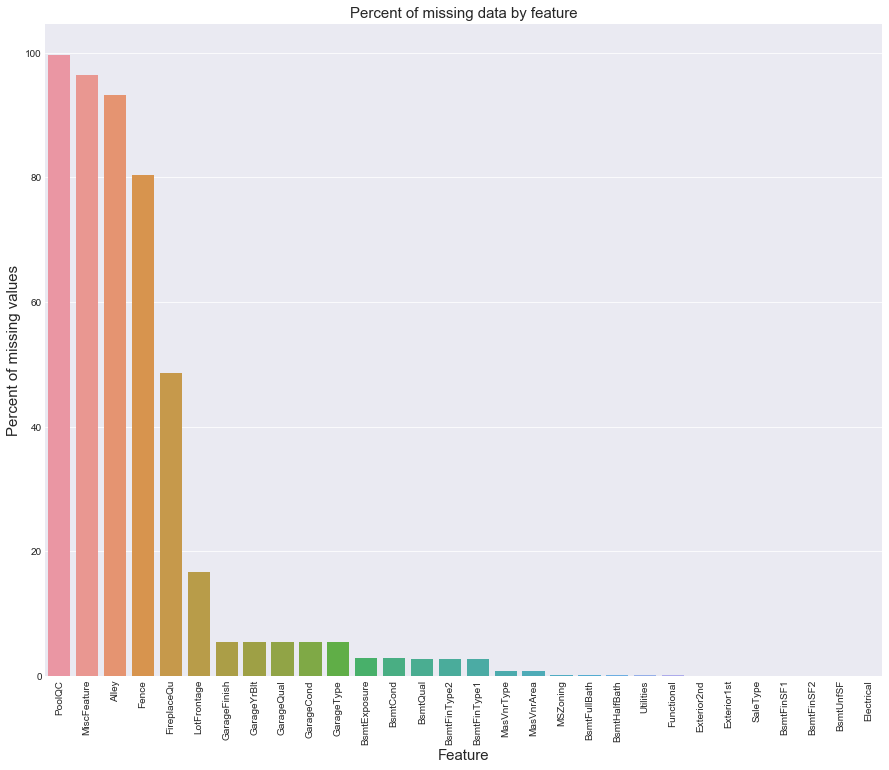

In [20]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Feature', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent of missing data by feature', fontsize=15)

####  Data Correlation

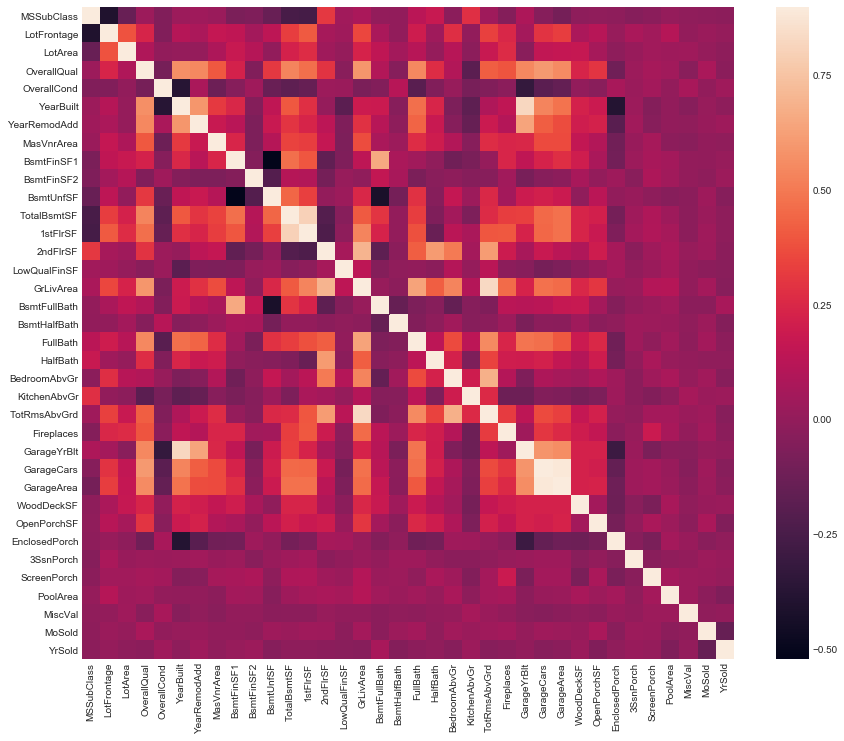

In [21]:
#Correlation map to see how features are correlated with SalePrice
corrmat = df_train.corr()
plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat, vmax=0.9, square=True)

### imputing missing values

#####  We impute them by proceeding sequentially through features with missing values 

- PoolQC: data description says NA means "No Pool". That make sense, given the huge ratio of missing value(+99%) and majority of houses have no Pool at all in genral.

In [22]:
all_data['PoolQC'] = all_data['PoolQC'].fillna("None")

- MiscFeature: data description says NA means "no misc feature"

In [23]:
all_data['MiscFeature'] = all_data['MiscFeature'].fillna('None')

- Alley: data description says NA means "no alley access"

In [24]:
all_data['Alley'] = all_data['Alley'].fillna('None')

In [25]:
all_data_na

PoolQC          99.691464
MiscFeature     96.400411
Alley           93.212204
Fence           80.425094
FireplaceQu     48.680151
LotFrontage     16.660953
GarageFinish     5.450806
GarageYrBlt      5.450806
GarageQual       5.450806
GarageCond       5.450806
GarageType       5.382242
BsmtExposure     2.811107
BsmtCond         2.811107
BsmtQual         2.776826
BsmtFinType2     2.742544
BsmtFinType1     2.708262
MasVnrType       0.822763
MasVnrArea       0.788481
MSZoning         0.137127
BsmtFullBath     0.068564
BsmtHalfBath     0.068564
Utilities        0.068564
Functional       0.068564
Exterior2nd      0.034282
Exterior1st      0.034282
SaleType         0.034282
BsmtFinSF1       0.034282
BsmtFinSF2       0.034282
BsmtUnfSF        0.034282
Electrical       0.034282
dtype: float64

- Fence: data description says NA means "no fence"

In [26]:
all_data['Fence'] = all_data['Fence'].fillna('None')

- FireplaceQu: data description says NA means "no fireplace"

In [27]:
all_data['FireplaceQu'] = all_data['FireplaceQu'].fillna('None')

- LotFrontage: Since the area of each street connected to the house property most likely have similar area to other houses in its neighborhood, we can fill in missing values by the median LotFrontage of the neighborhood.

In [28]:
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

- GarageType, GarageFinish, GarageQual, GarageCond: replacing missing data with None

In [29]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

- GarageYrBlt, GarageArea, GarageCars: Replacing missing data with 0

In [30]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

- BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath: missing values are likely zeros for having no basement

In [31]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

- BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2: For all these categorical basement-related features,NaN means that there is no basement.

In [32]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

- MasVnrArea and MasVnrType:NA most likely means no masonry veneer for these houses.We can fill 0 for the area and None for the type.

In [33]:
all_data['MasVnrArea'] = all_data['MasVnrArea'].fillna(0)
all_data['MasVnrType'] = all_data['MasVnrType'].fillna('None')

- MSZoning(The general zoning classification): 'RL' is by far the most common values. So we can fill in missing values with 'RL'

In [34]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

- Utilities:For this categorical feature all records are "AllPub",except for one "NoSeWa" and 2 NA, Since the house with 'NoSeWa' is in the training set, this feature won't help in predictive modeling. We can then safely remove it.

In [35]:
all_data = all_data.drop(['Utilities'], axis=1)

- Functional:data description says NA means typical

In [36]:
all_data['Functional'] = all_data['Functional'].fillna("Typ")

- Electrical: It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.

In [37]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

- KitchenQual: Only one NA value, and same as Electrical,we set 'TA'(which is the most frequent) for the missing value in KitchenQual.

In [38]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

- Exterior1st and Exterior2nd: Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string.

In [39]:
for col in ('Exterior1st', 'Exterior2nd'):
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])

- SaleType:Fill in again with most frequent which is 'WD'

In [40]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

- MSSubClass:Na most likely means No building class.We can replace missing values with None.

In [41]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna('None')

#### 检查是否还有缺失值

In [42]:
all_data_na = (all_data.isnull().sum())/(all_data.isnull().count()) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio': all_data_na})
missing_data.head()

,Missing Ratio


In [43]:
##### 将一些变量转换类型(数值型转换为字符型)
all_data['MSSubClass'] = all_data['MSSubClass'].astype('str')

In [44]:
all_data['OverallCond'] = all_data['OverallCond'].astype('str')
all_data['YrSold'] = all_data['YrSold'].astype('str')
all_data['MoSold'] = all_data['MoSold'].astype('str')

In [45]:
# Label Encoding some categorical variables that may contain information in their ordering set
#将各种标签分配一个可数的连续编号
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 'ExterQual',
        'ExterCond', 'HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 'BsmtFinType2', 
        'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope', 'LotShape',
        'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond',
        'YrSold', 'MoSold')
for col in cols:
    lbl = LabelEncoder()
    lbl.fit(list(all_data[col].values))
    all_data[col] = lbl.transform(list(all_data[col].values))

print(f'Shape all_data:{all_data.shape}')

Shape all_data:(2917, 78)


In [46]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [47]:
numeric_feats = all_data.dtypes[all_data.dtypes != 'object'].index
# check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

In [48]:
skewness = pd.DataFrame({'Skew': skewed_feats})
skewness.head(10)  #数据的偏斜度

,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


In [49]:
skewness = skewness[abs(skewness) > 0.75]
print(f'There are {skewness.shape[0]} skewed numerical features to Box Cox transform')

There are 59 skewed numerical features to Box Cox transform


In [50]:
from scipy.special import boxcox1p #box-cox变换，使其符合正态分布（正态分布是线性回归的前提）
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)

In [51]:
#将类别转换为虚拟变量，即one-hot编码
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 220)


In [52]:
#获得新的训练集和测试集
train = all_data[:ntrain]
test = all_data[ntrain:]

### 选择模型

In [53]:
from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

#### 交叉验证集

In [54]:
n_folds = 5

def rmse_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model, train.values, y_train, scoring='neg_mean_squared_error', cv=kf))
    return(rmse)

- LASSO Regression

In [55]:
#由于模型可能对临界值比较敏感，所以使用sklearn的pipeline的Robustscaler()方法使其更健壮
#Lasso回归拟合线性模型的时候会进行变量筛选和复杂度调整(避免过拟合)
lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state=1))

- Elastic Net Regression（同样是为了保持其健壮性）

In [56]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

- Kernel Ridge Regression

In [57]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

- Gradient Boosting Regression:

In [58]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10,
                                   loss='huber', random_state=5)

- XGBoost

In [59]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468,
                            learning_rate=0.05, max_depth=3,
                            min_child_weight=1.7817, n_estimators=2200,
                            reg_alpha=0.4640, reg_lambda=0.8571,
                            subsample=0.5213, silent=1,
                            random_state=7, ntheat= -1)

- LightGBM

In [60]:
model_lgb = lgb.LGBMRegressor(objective='regression', num_leaves=5,
                             learning_rate=0.05, n_estimators=720,
                             max_bin=55, bagging_fraction = 0.8,
                             bagging_freq=5, feature_fraction=0.2319,
                             feature_fraction_seed=9, bagging_seed=9,
                             min_data_in_leaf=6, min_sum_hessian_in_leaf = 11)

- Base models scores

In [61]:
score = rmse_cv(lasso)
print(f'Lasso score: {score.mean():.4f} ({score.std():.4f})')

Lasso score: 0.1115 (0.0074)


In [62]:
score = rmse_cv(ENet)
print(f'Lasso score: {score.mean():.4f} ({score.std():.4f})')

Lasso score: 0.1116 (0.0074)


In [63]:
score = rmse_cv(KRR)
print(f'Lasso score: {score.mean():.4f} ({score.std():.4f})')

Lasso score: 0.1153 (0.0075)


In [64]:
score = rmse_cv(GBoost)
print(f'Lasso score: {score.mean():.4f} ({score.std():.4f})')

Lasso score: 0.1167 (0.0084)


In [65]:
score = rmse_cv(model_xgb)
print(f'Lasso score: {score.mean():.4f} ({score.std():.4f})')

Lasso score: 0.1166 (0.0058)


In [66]:
score = rmse_cv(model_lgb)
print(f'Lasso score: {score.mean():.4f} ({score.std():.4f})')

Lasso score: 0.1159 (0.0060)


##  Stacking models

### Simplest Stacking approach: Averaging base models

#### Averaged base models class

In [67]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)
        
        return self
    
    
    # Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)

#### Average base models score

##### We just average four models here ENet, GBoost, KRR and lasso. Of course we could easily add more models in the mix.

In [68]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmse_cv(averaged_models)
print(f"Averaged base models score:{score.mean():.4f} ({score.std():.4f})")

Averaged base models score:0.1087 (0.0077)


### Lessing simple Stacking:Adding a Meta-model

In this approach, we add a meta-model on averaged base models and use the out-of-folds predictions of these base models to train our meta-models.
The procedure,for the training part, may be described as follows:

1. Split the total training set into two disjoint sets(here train and .holdout)
2. Train several base models on the first part(train)
3. Test these base models on the second part(holdout)
4. Use the predictions from 3)(called out-of-folds predictions) as the inputs, and the correct response (target variable) as the outputs to train a higher level learner called meta-model.

The first three steps are done iteratively.If we take for example a 5-fold stacking, we first split the training data into 5 folds.Then we will do 5 iterations.In each iteration,we train every base model on 4 folds and predict on the remaining fold(holdout fold).

So, we will be sure, after 5 iterations, that the entire data is used to get out-of-folds predictions that we will then use as new feature to train our meta-model in setp 4,

For the predict part, We average the predictions of all base models on the test data and used them as meta-features on which, the final prediction is done with the meta-model.
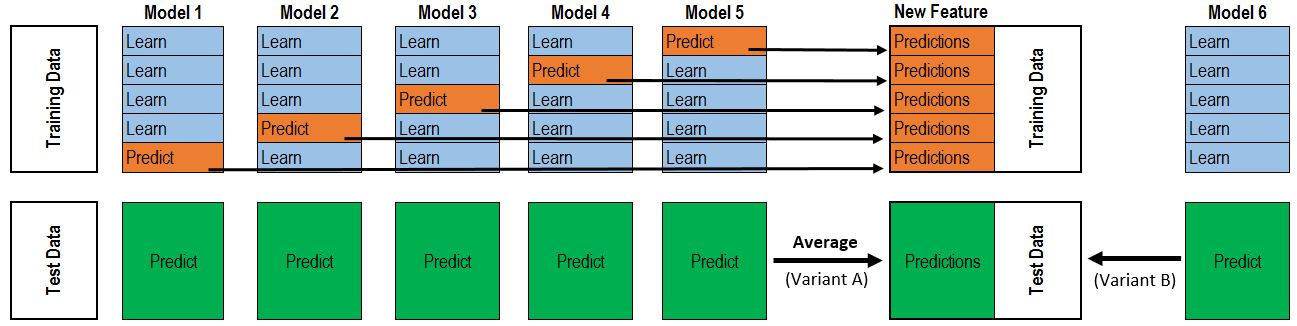

![image](http://s5047.pcdn.co/wp-content/uploads/2017/06/image5.gif)

On this gif, the base models are algorithms 0, 1, 2 and the meta-model is algorithm 3, The entire training dataset is A+B (target variable y known) that we can split into train part(A) and holdout part(B).And the test dataset is C.

B1(which is the prediction from the holdout part) is the new feature used to train the meta-model 3 and C1 (which is the prediction from the test dataset) is the meta-feature on which the final prediction is done.

### Stacking averaged Models Class

In [69]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=50):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
        
    #We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits = self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
    
    # Do the predictions of all base models on the test data and use the averaged predictions as meta- deatures for the final prediction
    # which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_])
        return self.meta_model_.predict(meta_features)
    

### Stacking Averaged models Score

#### To make the two approaches comparable (by using the same number of models), we just average Enet KRR and Gboost,then we add lasso as meta-model.

In [70]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                               meta_model = lasso)

score = rmse_cv(stacked_averaged_models)
print(f"Stacking Averaged models score: {score.mean():.4f} ({score.std():.4f})")
print('test')

Stacking Averaged models score: 0.1083 (0.0074)
test


## Ensembling StackedRegressor, XGBoost and LightGBM

### We add XGBoost and LightGBM to the StackedRegressor defined previously.

##### We first define a rmse evaluation function

In [75]:
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

### Final Training and Prediction

#### StackedRegressor:

In [76]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmse(y_train, stacked_train_pred))

0.07315745857227518


#### XGBoost:

In [77]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmse(y_train, xgb_train_pred))

0.07824248160386514


#### LightGBM

In [79]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmse(y_train, lgb_train_pred))

0.07353887965991494


In [80]:
''' RMSE on the entire Train data when averaging'''
print('RMSLE score on train data:')
print(rmse(y_train, stacked_train_pred * 0.70 + 
          xgb_train_pred * 0.15 + lgb_train_pred * 0.15))

RMSLE score on train data:
0.07186155187404067


### Ensembel prediction

In [81]:
ensemble = stacked_pred * 0.70 + xgb_pred * 0.15 + lgb_pred * 0.15

In [96]:
ensemble

array([120722.99741541, 159151.81761755, 188217.3731215 , ...,
       169135.2349413 , 116241.65281195, 220835.86685203])

### Submission

In [95]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble
sub.to_csv(data_folder+'/submission.csv', index=False)